# Gaussian Mixture Models
## This notebook outlines the usage of Gaussian Mixture Models as Data Generator

# GMM for Generating New Data

GMM is also used for generating new data

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Next let's plot the first 100 of these to recall exactly what we're looking at:

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture as GMM

<Figure size 720x720 with 0 Axes>

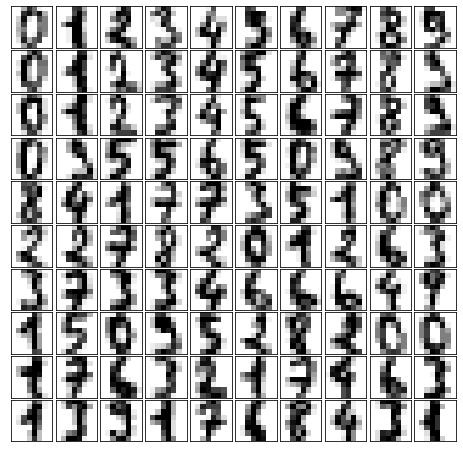

In [3]:
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
        
plt.figure(figsize=(10,10))
plot_digits(digits.data)

We have nearly 1,800 digits in 64 dimensions, and we can build a GMM on top of these to generate more.
GMMs can have difficulty converging in such a high dimensional space, so we will start with an invertible dimensionality reduction algorithm on the data.
Here we will use a straightforward PCA, asking it to preserve 99% of the variance in the projected data:

In [28]:
from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
print(pca.n_components_)
data.shape

41


(1797, 41)

The result is 41 dimensions, a reduction of nearly 1/3 with almost no information loss.
Given this projected data, let's use the AIC to get a gauge for the number of GMM components we should use:

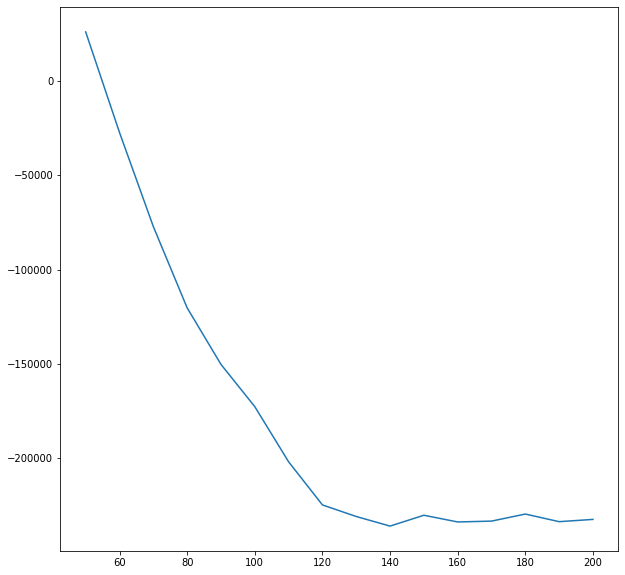

In [29]:
n_components = np.arange(50, 210, 10)
models = [GMM(n, covariance_type='full', random_state=0)
          for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.figure(figsize=(10,10))
plt.plot(n_components, aics);

It appears that around 150 components minimizes the AIC; we will use this model.
Let's quickly fit this to the data and confirm that it has converged:

In [33]:
gmm = GMM(140, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_)

True


Now we can draw samples of 100 new points within this 41-dimensional projected space, using the GMM as a generative model:

In [34]:
X, _ = gmm.sample(100)
X.shape

(100, 41)

Finally, we can use the inverse transform of the PCA object to construct the new digits:

<Figure size 720x720 with 0 Axes>

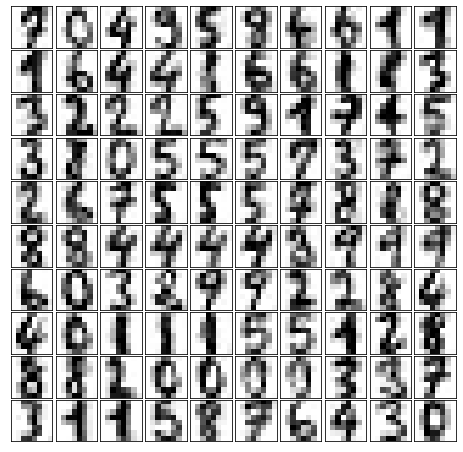

In [35]:
digits_new = pca.inverse_transform(X)
plt.figure(figsize=(10,10))
plot_digits(digits_new)

The results for the most part look like plausible digits from the dataset!

Given a sampling of handwritten digits, we have **modeled the distribution of that data** in such a way that we can **generate brand new samples** of digits from the data: these are "handwritten digits" which do not individually appear in the original dataset, but rather capture the general features of the input data as modeled by the mixture model.
